# 多項式函數逼近隨機資料點

- 給定 N 組 x, y 的對應
- 找 1條多項式函數來逼近它。


In [24]:
import numpy as np
import matplotlib.pyplot as pl

# 設定 x 範圍
x= np.linspace(-10,10, 21)
x

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [26]:
# 設定多項式函數 f()，指定係數 為 [1,-1,1]
f= np.polynomial.Polynomial([1,-1,1])
f

Polynomial([ 1., -1.,  1.], domain=[-1,  1], window=[-1,  1])

In [27]:
# 將 x 代入 f()，得到 y
y= f(x)
y

array([111.,  91.,  73.,  57.,  43.,  31.,  21.,  13.,   7.,   3.,   1.,
         1.,   3.,   7.,  13.,  21.,  31.,  43.,  57.,  73.,  91.])

In [28]:
# 製造 隨機數 (常態分布) z，用來「破壞」y
z= np.random.normal(0,10,size=y.size)
z

array([ -2.02870938,   3.4577216 ,  -8.07842359, -15.15669566,
        10.40359022,  -1.92201125,  -0.81898413,  -0.95896184,
         1.88968946,   3.02966158, -13.59757948,  22.83359537,
         3.79023017,  -6.59169083, -10.26149854,   8.41960121,
        -2.2634943 ,  10.30813631,   7.11205565,  17.94142338,
         4.94338545])

In [30]:
# 把 隨機數 z 加到 y，用來「破壞」y，得到 q，作為 本題之 已知 = (x,q)
q= y+z
q

array([108.97129062,  94.4577216 ,  64.92157641,  41.84330434,
        53.40359022,  29.07798875,  20.18101587,  12.04103816,
         8.88968946,   6.02966158, -12.59757948,  23.83359537,
         6.79023017,   0.40830917,   2.73850146,  29.41960121,
        28.7365057 ,  53.30813631,  64.11205565,  90.94142338,
        95.94338545])

In [31]:
# 把 (x,q) 作為 本題之 已知 資料配對。
x,q

(array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 array([108.97129062,  94.4577216 ,  64.92157641,  41.84330434,
         53.40359022,  29.07798875,  20.18101587,  12.04103816,
          8.88968946,   6.02966158, -12.59757948,  23.83359537,
          6.79023017,   0.40830917,   2.73850146,  29.41960121,
         28.7365057 ,  53.30813631,  64.11205565,  90.94142338,
         95.94338545]))

In [34]:
'''
x,q= (
 np.array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 np.array([108.97129062,  94.4577216 ,  64.92157641,  41.84330434,
         53.40359022,  29.07798875,  20.18101587,  12.04103816,
          8.88968946,   6.02966158, -12.59757948,  23.83359537,
          6.79023017,   0.40830917,   2.73850146,  29.41960121,
         28.7365057 ,  53.30813631,  64.11205565,  90.94142338,
         95.94338545])
 )
'''


'\nx,q= (\n np.array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,\n          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),\n np.array([108.97129062,  94.4577216 ,  64.92157641,  41.84330434,\n         53.40359022,  29.07798875,  20.18101587,  12.04103816,\n          8.88968946,   6.02966158, -12.59757948,  23.83359537,\n          6.79023017,   0.40830917,   2.73850146,  29.41960121,\n         28.7365057 ,  53.30813631,  64.11205565,  90.94142338,\n         95.94338545])\n )\n'

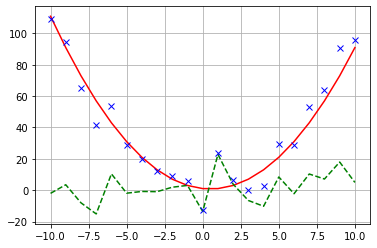

In [35]:
# 把理論值 y，隨機值z，以及 破壞 y 所得到的 q，一起劃出。
pl.plot(x,y,'r',
        x,z,'g--',
        x,q,'bx'
        )
pl.grid()

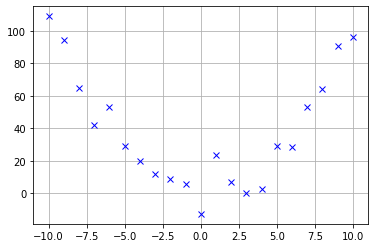

In [36]:
# 僅留下 作為已知的的資料配對 (x,q)
pl.plot(#x,y,'r',
        #x,z,'g',
        x,q,'bx'
        )
pl.grid()

In [37]:
x,q

(array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 array([108.97129062,  94.4577216 ,  64.92157641,  41.84330434,
         53.40359022,  29.07798875,  20.18101587,  12.04103816,
          8.88968946,   6.02966158, -12.59757948,  23.83359537,
          6.79023017,   0.40830917,   2.73850146,  29.41960121,
         28.7365057 ,  53.30813631,  64.11205565,  90.94142338,
         95.94338545]))

In [65]:
# 執行 多項式 適配 (fit)，得到 p1()，deg=1，直線
p1= np.polynomial.Polynomial.fit(x,q,deg=1)
#p1.coef, \
p1

Polynomial([39.21195435, -4.22734743], domain=[-10.,  10.], window=[-1.,  1.])

In [66]:
# 執行 多項式 適配 (fit)，得到 p2()，deg=2，2次曲線 (拋物線)
p2= np.polynomial.Polynomial.fit(x,q,deg=2)
#p2.coef,\
p2

Polynomial([  1.24695095,  -4.22734743, 103.54091838], domain=[-10.,  10.], window=[-1.,  1.])

In [67]:
# 執行 多項式 適配 (fit)，得到 p3()，deg=3，3次曲線 
p3= np.polynomial.Polynomial.fit(x,q,deg=3)
#p3.coef,\
p3

Polynomial([  1.24695095,  -7.00533646, 103.54091838,   4.22186782], domain=[-10.,  10.], window=[-1.,  1.])

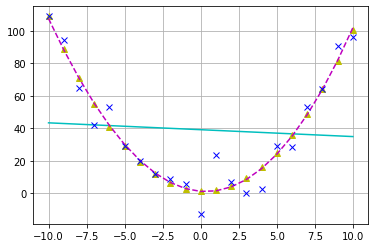

In [68]:
y1= p1(x)
y2= p2(x)
y3= p3(x)
pl.plot(x,y1,'c',
        x,y2,'y^',
        x,y3,'m--',
        x,q,'bx'
        )
pl.grid()

<ipython-input-17-050867a1bf13>:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  a= np.linalg.lstsq(A,q)


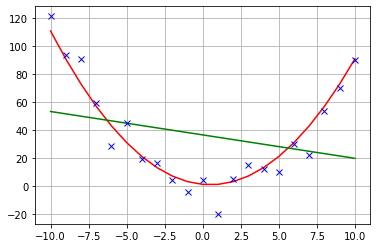

In [17]:

A= x[:,None]
A= A**[0,1]
A

a= np.linalg.lstsq(A,q)
a= a[0]
a

g= np.polynomial.Polynomial(a)
g

yHat= g(x)
pl.plot(x,y,'r',
        x,yHat,'g',
        x,q,'bx'
        )
pl.grid()

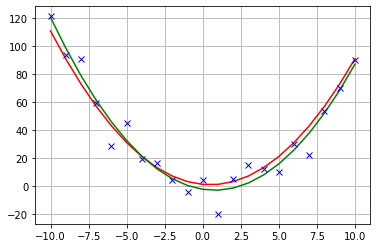

In [18]:

A= x[:,None]
A= A**[0,1,2]
A

a= np.linalg.lstsq(A,q, rcond=None)
a= a[0]
a

g= np.polynomial.Polynomial(a)
g

yHat= g(x)
pl.plot(x,y,'r',
        x,yHat,'g',
        x,q,'bx'
        )
pl.grid()

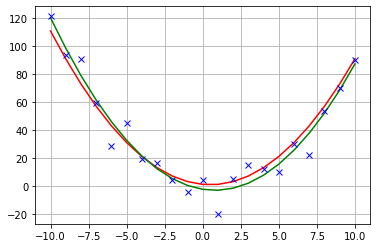

In [19]:
A= x[:,None]
A= A**[0,1,2,3]
A

a= np.linalg.lstsq(A,q,rcond=None)
a= a[0]
a

g= np.polynomial.Polynomial(a)
g

yHat= g(x)
pl.plot(x,y,'r',
        x,yHat,'g',
        x,q,'bx'
        )
pl.grid()

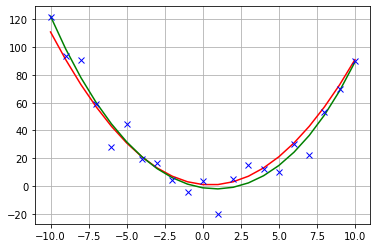

In [20]:
A= x[:,None]
A= A**[0,1,2,3,4]
A

a= np.linalg.lstsq(A,q, rcond=None)
a= a[0]
a

g= np.polynomial.Polynomial(a)
g

yHat= g(x)
pl.plot(x,y,'r',
        x,yHat,'g',
        x,q,'bx'
        )
pl.grid()

In [21]:
gg= np.polynomial.Polynomial.fit(x,q,deg=4)
gg

Polynomial([ -1.35838602, -17.28314027,  95.59921105,   0.75262809,
        11.57211045], domain=[-10.,  10.], window=[-1.,  1.])

In [22]:
g

Polynomial([-1.35838602e+00, -1.72831403e+00,  9.55992110e-01,  7.52628093e-04,
        1.15721104e-03], domain=[-1,  1], window=[-1,  1])

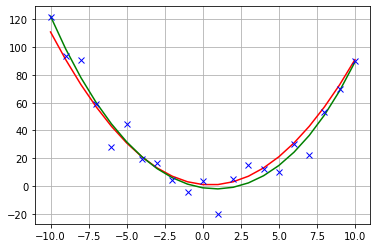

In [23]:
yHat= gg(x)
pl.plot(x,y,'r',
        x,yHat,'g',
        x,q,'bx'
        )
pl.grid()